In [ ]:
#Analyzes the data made by the test.ipynb file

In [ ]:
#Imports necessary packages
import numpy as np
from envs.grid_word_AB import GridWorld
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl
from sklearn.cluster import KMeans

In [7]:
#Declares lists to store data
data_down = []
data_up = []
data_center = []
#Scans in all of the data files associated with the down path into the corresponding list
data_down.append(np.load(open("data/gridworld_discrete/policy-down-games-50-slip0.npy","rb"), allow_pickle=True))
data_down.append(np.load(open("data/gridworld_discrete/policy-down-games-50-slip10.npy","rb"), allow_pickle=True))
data_down.append(np.load(open("data/gridworld_discrete/policy-down-games-50-slip20.npy","rb"), allow_pickle=True))
data_down.append(np.load(open("data/gridworld_discrete/policy-down-games-50-slip30.npy","rb"), allow_pickle=True))
data_down.append(np.load(open("data/gridworld_discrete/policy-down-games-50-slip40.npy","rb"), allow_pickle=True))
data_down.append(np.load(open("data/gridworld_discrete/policy-down-games-50-slip50.npy","rb"), allow_pickle=True))
data_down.append(np.load(open("data/gridworld_discrete/policy-down-games-50-slip60.npy","rb"), allow_pickle=True))
data_down.append(np.load(open("data/gridworld_discrete/policy-down-games-50-slip70.npy","rb"), allow_pickle=True))
data_down.append(np.load(open("data/gridworld_discrete/policy-down-games-50-slip80.npy","rb"), allow_pickle=True))
data_down.append(np.load(open("data/gridworld_discrete/policy-down-games-50-slip89.npy","rb"), allow_pickle=True))
#Converts all of the data into list format
for i in range(len(data_down)):
    data_down[i] = data_down[i].tolist()
#Scans in all of the data files associated with the up path into the corresponding list
data_up.append(np.load(open("data/gridworld_discrete/policy-up-games-50-slip0.npy","rb"), allow_pickle=True))
data_up.append(np.load(open("data/gridworld_discrete/policy-up-games-50-slip10.npy","rb"), allow_pickle=True))
data_up.append(np.load(open("data/gridworld_discrete/policy-up-games-50-slip20.npy","rb"), allow_pickle=True))
data_up.append(np.load(open("data/gridworld_discrete/policy-up-games-50-slip30.npy","rb"), allow_pickle=True))
data_up.append(np.load(open("data/gridworld_discrete/policy-up-games-50-slip40.npy","rb"), allow_pickle=True))
data_up.append(np.load(open("data/gridworld_discrete/policy-up-games-50-slip50.npy","rb"), allow_pickle=True))
data_up.append(np.load(open("data/gridworld_discrete/policy-up-games-50-slip60.npy","rb"), allow_pickle=True))
data_up.append(np.load(open("data/gridworld_discrete/policy-up-games-50-slip70.npy","rb"), allow_pickle=True))
data_up.append(np.load(open("data/gridworld_discrete/policy-up-games-50-slip80.npy","rb"), allow_pickle=True))
data_up.append(np.load(open("data/gridworld_discrete/policy-up-games-50-slip89.npy","rb"), allow_pickle=True))
#Converts all of the data into list format
for i in range(len(data_up)):
    data_up[i] = data_up[i].tolist()
#Scans in all of the data files associated with the center path into the corresponding list
data_center.append(np.load(open("data/gridworld_discrete/policy-center-games-50-slip0.npy","rb"), allow_pickle=True))
data_center.append(np.load(open("data/gridworld_discrete/policy-center-games-50-slip10.npy","rb"), allow_pickle=True))
data_center.append(np.load(open("data/gridworld_discrete/policy-center-games-50-slip20.npy","rb"), allow_pickle=True))
data_center.append(np.load(open("data/gridworld_discrete/policy-center-games-50-slip30.npy","rb"), allow_pickle=True))
data_center.append(np.load(open("data/gridworld_discrete/policy-center-games-50-slip40.npy","rb"), allow_pickle=True))
data_center.append(np.load(open("data/gridworld_discrete/policy-center-games-50-slip50.npy","rb"), allow_pickle=True))
data_center.append(np.load(open("data/gridworld_discrete/policy-center-games-50-slip60.npy","rb"), allow_pickle=True))
data_center.append(np.load(open("data/gridworld_discrete/policy-center-games-50-slip70.npy","rb"), allow_pickle=True))
data_center.append(np.load(open("data/gridworld_discrete/policy-center-games-50-slip80.npy","rb"), allow_pickle=True))
data_center.append(np.load(open("data/gridworld_discrete/policy-center-games-50-slip89.npy","rb"), allow_pickle=True))
#Converts all of the data into list format
for i in range(len(data_center)):
    data_center[i] = data_center[i].tolist()

In [8]:
#Scans through all of the data and takes the average position of each game
summarized_down_data = []
summarized_up_data = []
summarized_center_data = []

for slipprob in data_down:
  down_game_data = []
  for game in slipprob:
    state_avg = np.zeros(2)
    for state in game:
      state_avg += state
    state_avg /= len(game)
    down_game_data.append(state_avg)
  summarized_down_data.append(down_game_data)
for slipprob in data_center:
  center_game_data = []
  for game in slipprob:
    state_avg = np.zeros(2)
    for state in game:
      state_avg += state
    state_avg /= len(game)
    center_game_data.append(state_avg)
  summarized_center_data.append(center_game_data)
for slipprob in data_up:
  up_game_data = []
  for game in slipprob:
    state_avg = np.zeros(2)
    for state in game:
      state_avg += state
    state_avg /= len(game)
    up_game_data.append(state_avg)
  summarized_up_data.append(up_game_data)

In [9]:
#converts all of the data to numpy arrays
for i in range(len(summarized_down_data)):
    summarized_down_data[i] = np.array(summarized_down_data[i])
for i in range(len(summarized_up_data)):
    summarized_up_data[i] = np.array(summarized_up_data[i])
for i in range(len(summarized_center_data)):
    summarized_center_data[i] = np.array(summarized_center_data[i])
summarized_down_data = np.array(summarized_down_data)
summarized_up_data = np.array(summarized_up_data)
summarized_center_data = np.array(summarized_center_data)

In [11]:
#makes a vstack out of all of the data
combined_data = []
for i in range(len(summarized_down_data)):
    combined_data.append(np.vstack([summarized_center_data[i], summarized_down_data[i], summarized_up_data[i]]))

In [12]:
#uses KMeans clustering on the vstack
kmeans = []
for i in range(len(combined_data)):
    kmeans.append(KMeans(n_clusters=3).fit(combined_data[i]))

In [13]:
#clusters the centers from the KMeans
for i in range(len(combined_data)):
    kmeans[i].cluster_centers_

C:\Users\gmcco\AppData\Local\Temp/ipykernel_25344/2864936982.py:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (10,4))


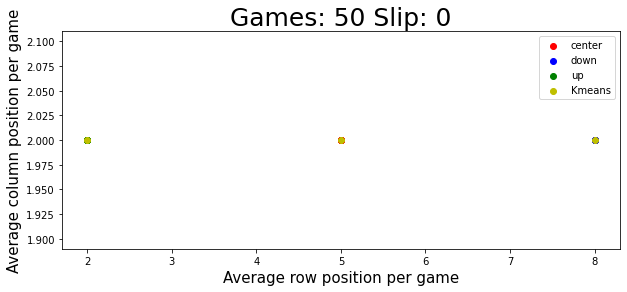

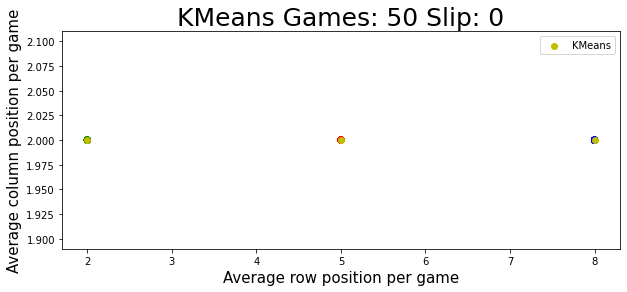

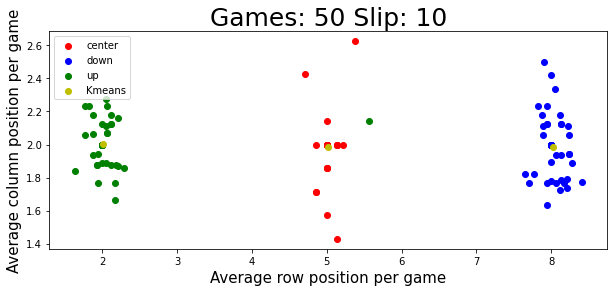

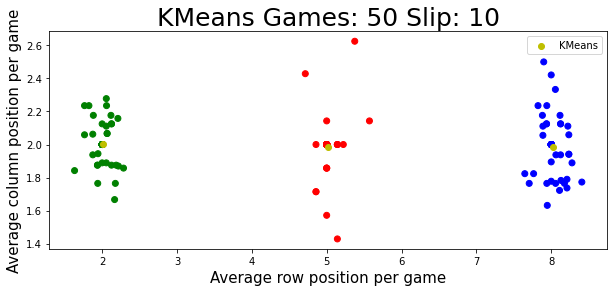

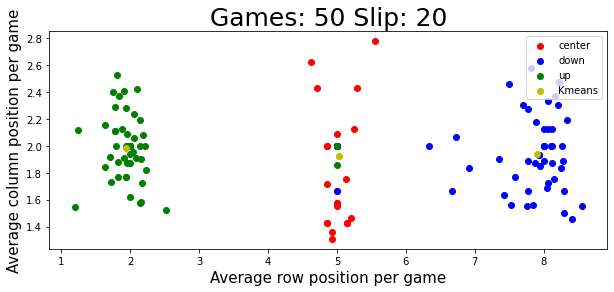

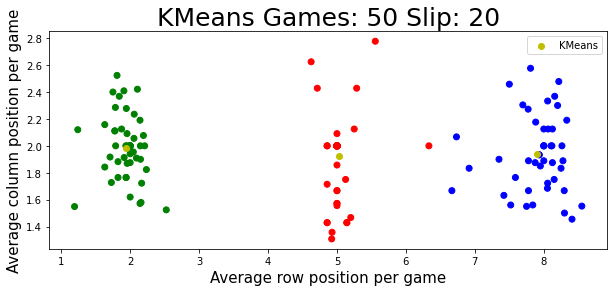

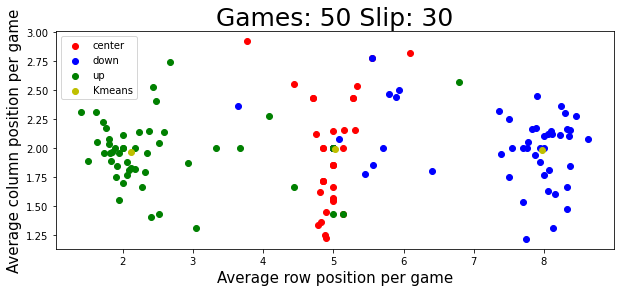

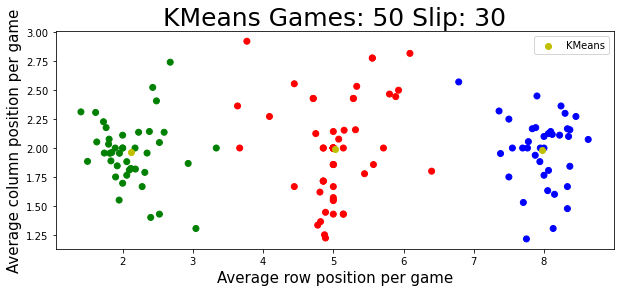

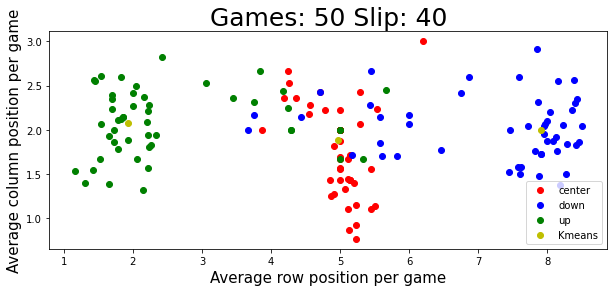

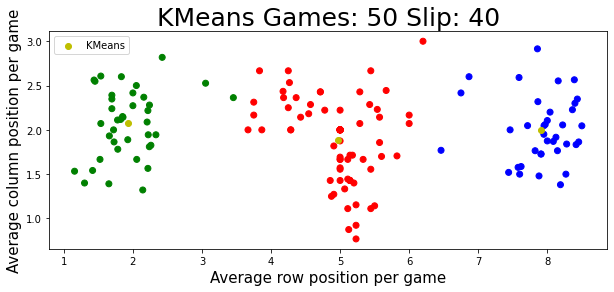

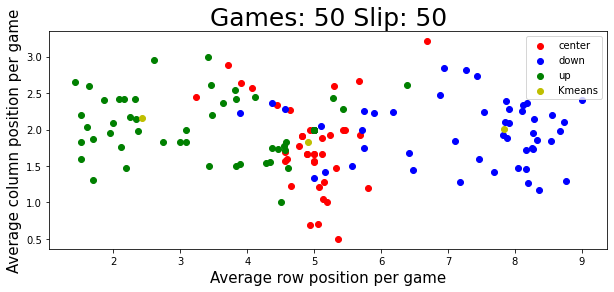

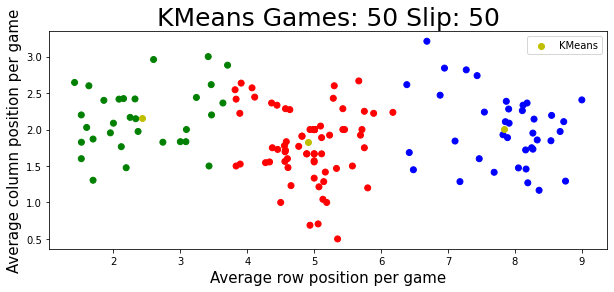

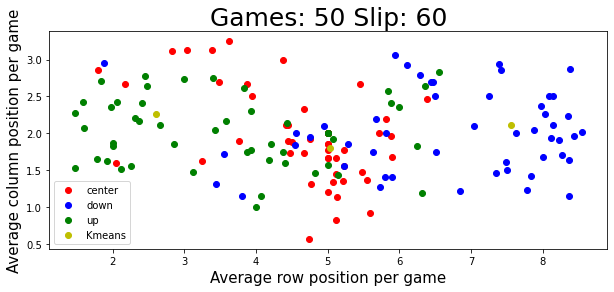

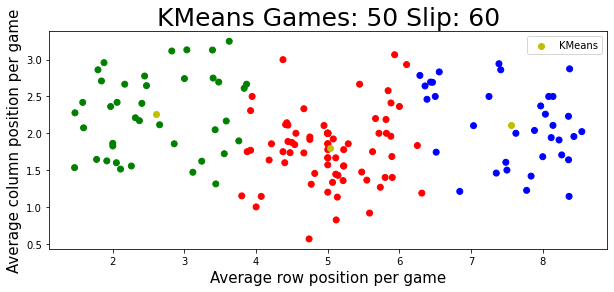

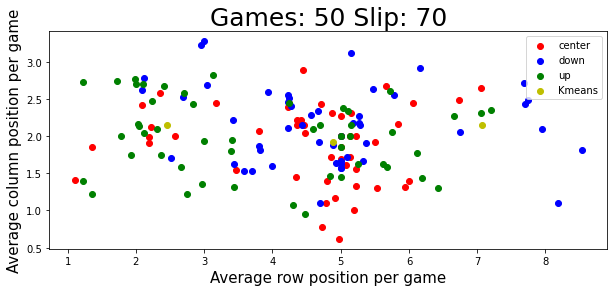

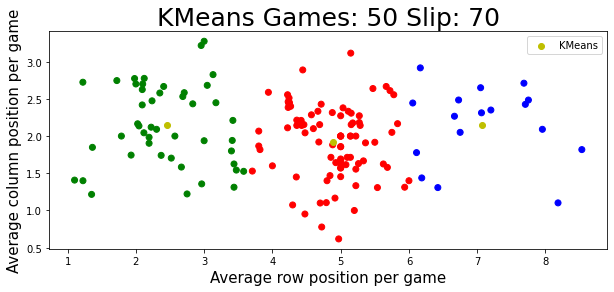

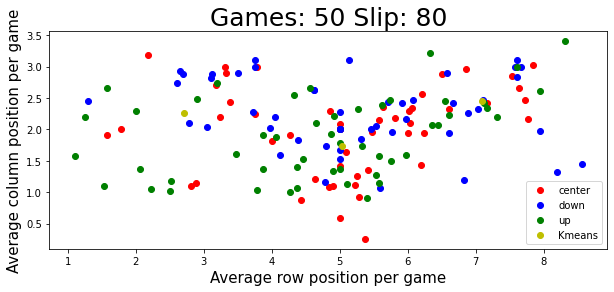

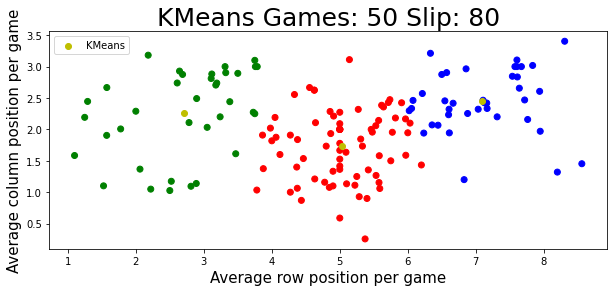

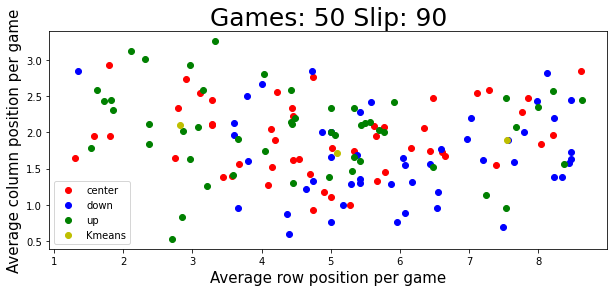

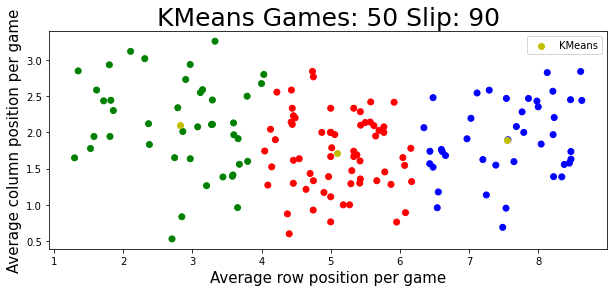

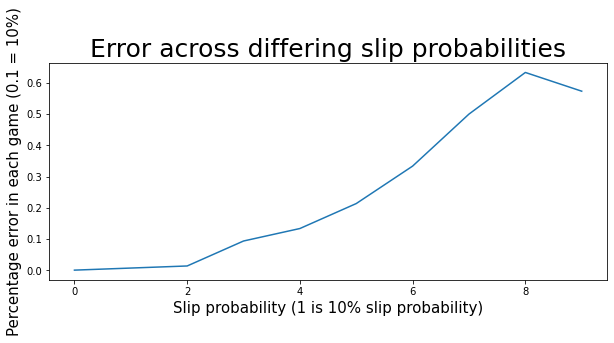

In [18]:
#Scans through all of the data and prints the average row position in each game
# for each slip probability with the KMeans data printed underneath
totalerrors = []
#Makes a graph for each slip probability
for i in range(len(summarized_center_data)):
    plt.figure(figsize = (10,4))
    plt.scatter(summarized_center_data[i][:,0], summarized_center_data[i][:,1], c='r', label = 'center')
    plt.scatter(summarized_down_data[i][:,0], summarized_down_data[i][:,1],  c='b', label = 'down')
    plt.scatter(summarized_up_data[i][:,0], summarized_up_data[i][:,1],  c='g', label = 'up')
    plt.scatter(kmeans[i].cluster_centers_[:, 0], kmeans[i].cluster_centers_[:, 1], c='y', label = 'Kmeans')
    plt.xlabel('Average row position per game', fontsize = 15)
    plt.ylabel('Average column position per game', fontsize = 15)
    plt.legend()
    plt.title('Games: 50 Slip: ' + str(i*10), fontsize = 25)
    plt.figure(figsize = (10,4))
    colors = []
    centers = sorted(kmeans[i].cluster_centers_[:,0])
    mappings = []
    #Remaps KMeans colors to match the colors for up, center, and down
    for j in range(3):
        mappings.append(centers.index(kmeans[i].cluster_centers_[:,0][j]))
    newlabels = []
    for label in kmeans[i].labels_:
        newlabels.append(mappings[label])
    for label in newlabels:
        if label == 0:
            color = 'green'
        elif label == 1:
            color = 'red'
        else:
            color = 'blue'
        colors.append(color)
    error = 0
    down_data_list = summarized_down_data[i].tolist()
    center_data_list = summarized_center_data[i].tolist()
    up_data_list = summarized_up_data[i].tolist()
    #Chcecks the error by checking each point against the KMeans cluster to see if they match
    for j in range(len(combined_data[i])):
        point = combined_data[i][j].tolist()
        label = newlabels[j]
        if label == 0:
            if point not in up_data_list:
                error += 1
        elif label == 1:
            if point not in center_data_list:
                error += 1
        else:
            if point not in down_data_list:
                error += 1
    error /= len(combined_data[i])
    totalerrors.append(error)
    #Makes the KMeans graph for each slip probability
    plt.scatter(combined_data[i][:,0], combined_data[i][:,1], c = colors)
    plt.scatter(kmeans[i].cluster_centers_[:, 0], kmeans[i].cluster_centers_[:, 1], c='y', label = 'KMeans')
    plt.xlabel('Average row position per game', fontsize = 15)
    plt.ylabel('Average column position per game', fontsize = 15)
    plt.legend()
    plt.title('KMeans Games: 50 Slip: ' + str(i*10), fontsize = 25)
#Makes the summary graph for all of the data
plt.figure(figsize = (10,4))
plt.ylabel('Percentage error in each game (0.1 = 10%)', fontsize = 15)
plt.xlabel('Slip probability (1 is 10% slip probability)', fontsize = 15)
plt.title('Error across differing slip probabilities', fontsize = 25)
plt.plot(totalerrors)